In [28]:
import pandas as pd
import plotnine as p

from scipy import stats

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [29]:
np.exp(5)

148.4131591025766

In [30]:
ps = np.exp(np.linspace(-15, 0, 32)) * 1000
ps = np.array(list(ps) * 100)

In [31]:
counts = stats.poisson.rvs(ps)

In [32]:
df = pd.DataFrame({'ps': ps, 'counts': counts})

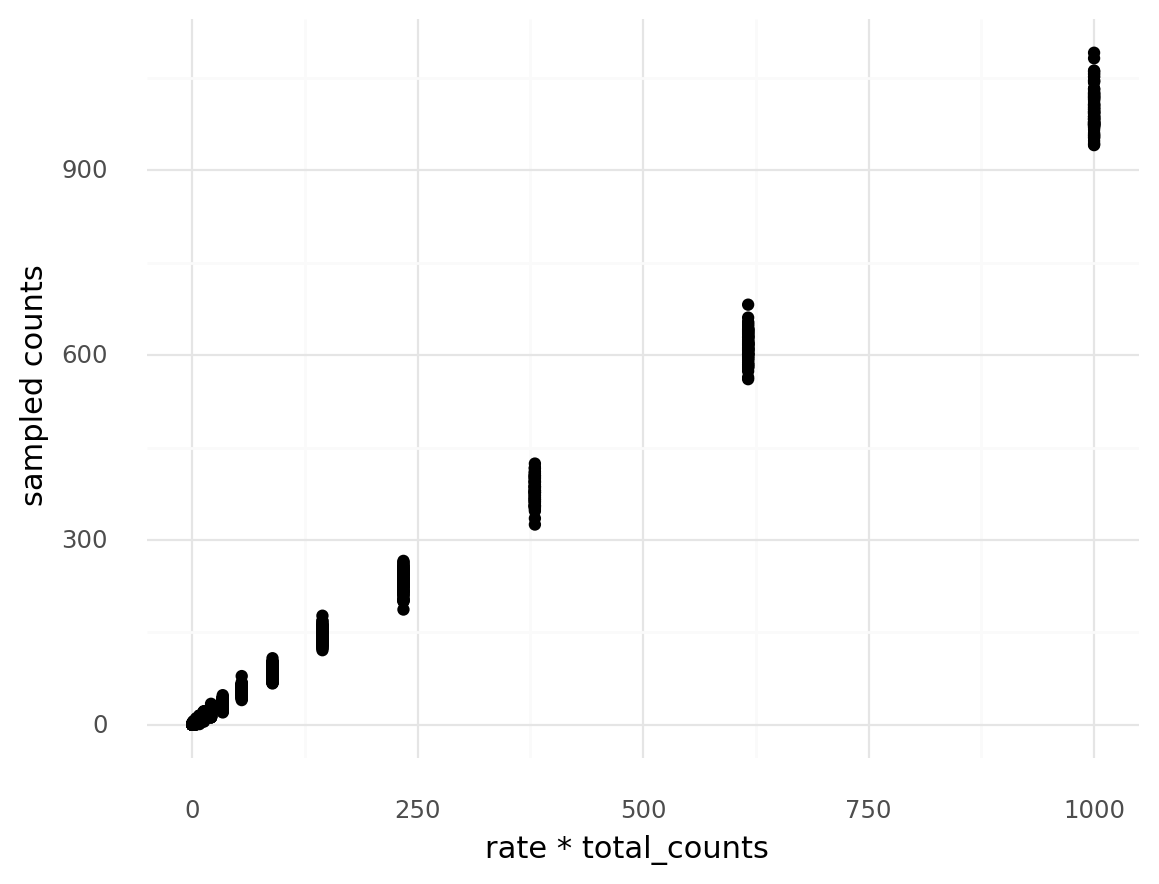

<ggplot: (8737859580242)>

In [34]:
(
    p.ggplot(p.aes(x = 'ps', y = 'counts'), df)
    + p.geom_point()
    + p.theme_minimal()
    + p.labs(x = 'rate * total_counts', y = 'sampled counts')
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


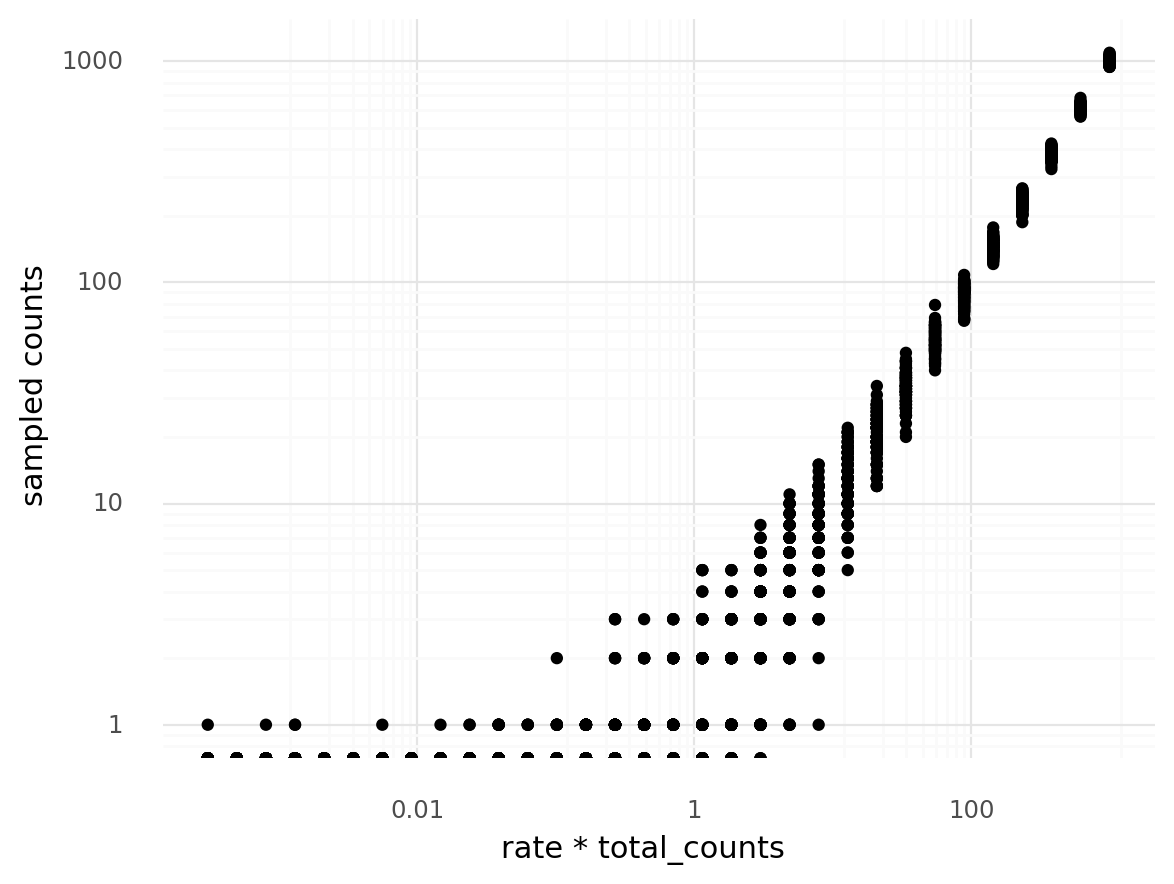

<ggplot: (8737859252932)>

In [35]:
(
    p.ggplot(p.aes(x = 'ps', y = 'counts'), df)
    + p.geom_point()
    + p.scale_y_log10()
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(x = 'rate * total_counts', y = 'sampled counts')
)

In [36]:
library_sizes = pd.read_csv('library_sizes.csv')

In [37]:
frac = np.exp(np.linspace(-15, 0, 32))
frac = np.repeat(frac, 100)

s = library_sizes['n_UMI'].sample(n = ps.shape[0]).values

ps = frac * s

counts = stats.poisson.rvs(ps)

df = pd.DataFrame({
    'ps': ps,
    'counts': counts,
    'total_counts': s,
    'fraction': frac
})

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


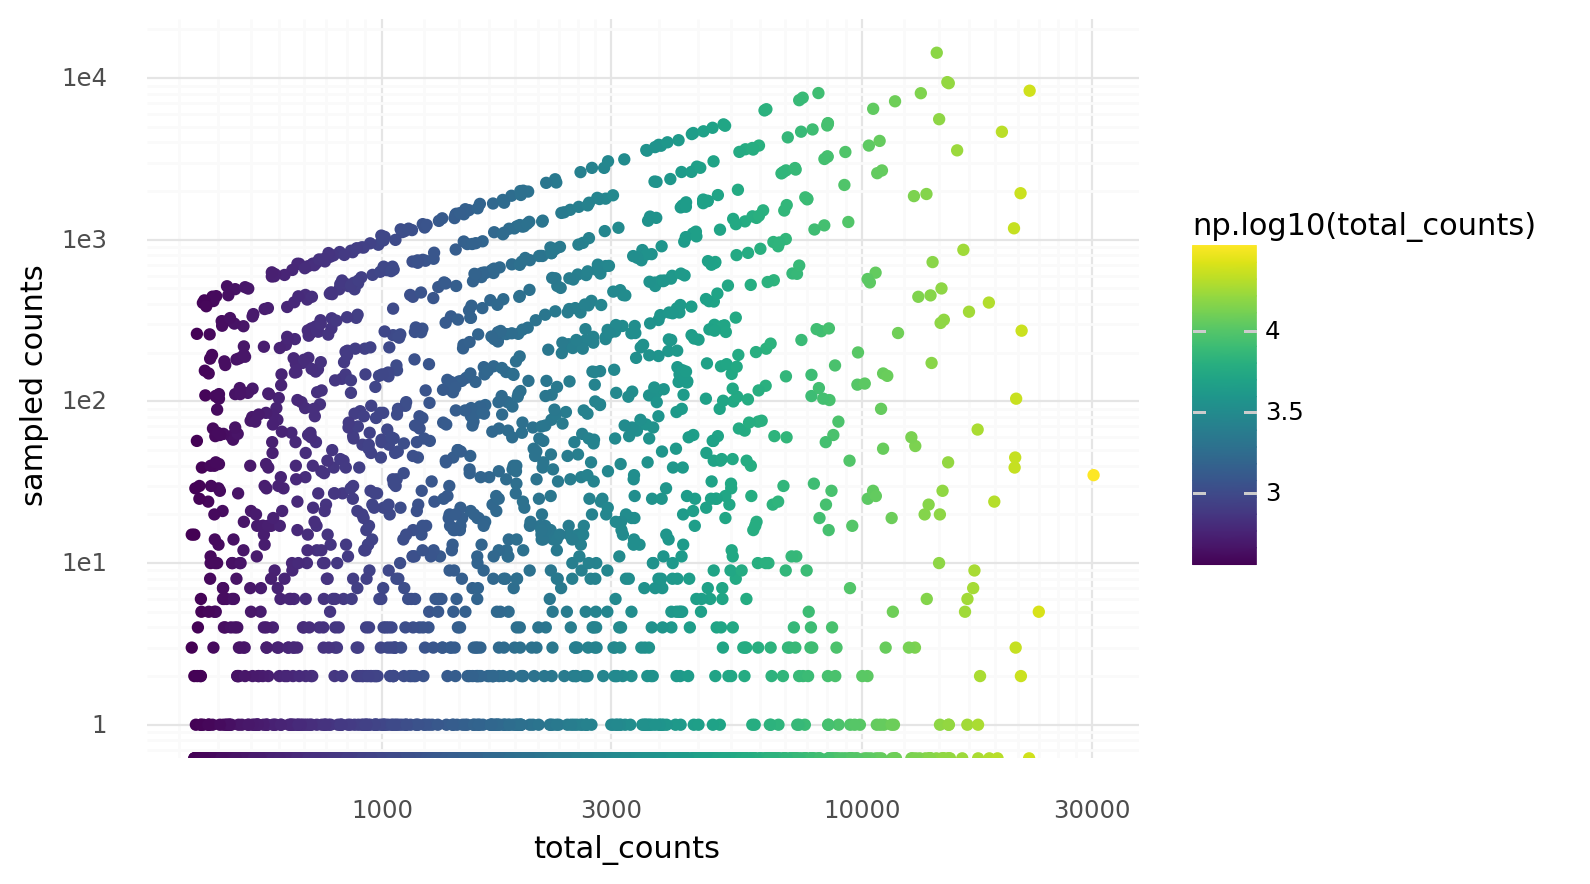

<ggplot: (8737859280601)>

In [38]:
(
    p.ggplot(p.aes(x = 'total_counts', y = 'counts', color = 'np.log10(total_counts)'), df)
    + p.geom_point()
    + p.scale_y_log10()
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(y = 'sampled counts')
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


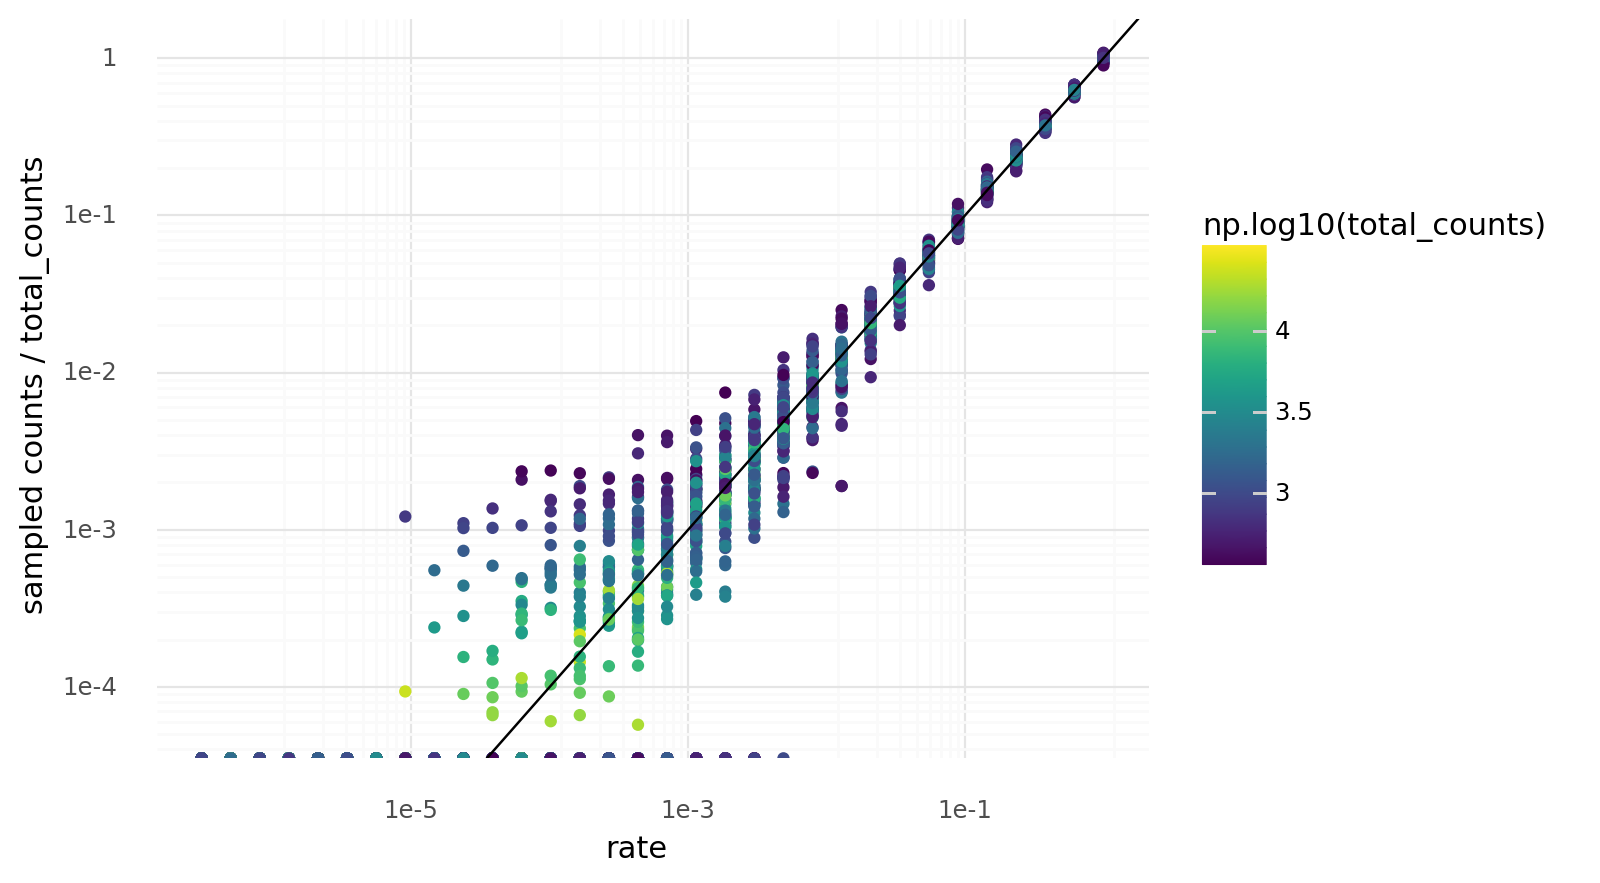

<ggplot: (8737857882628)>

In [43]:
(
    p.ggplot(p.aes(x = 'fraction', y = 'counts / total_counts', color = 'np.log10(total_counts)'), df)
    + p.geom_point()
    + p.geom_abline()
    + p.scale_y_log10()
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(x = 'rate', y = 'sampled counts / total_counts')
)

In [44]:
pdf = df.groupby('fraction')[['counts', 'total_counts']].sum().reset_index()

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


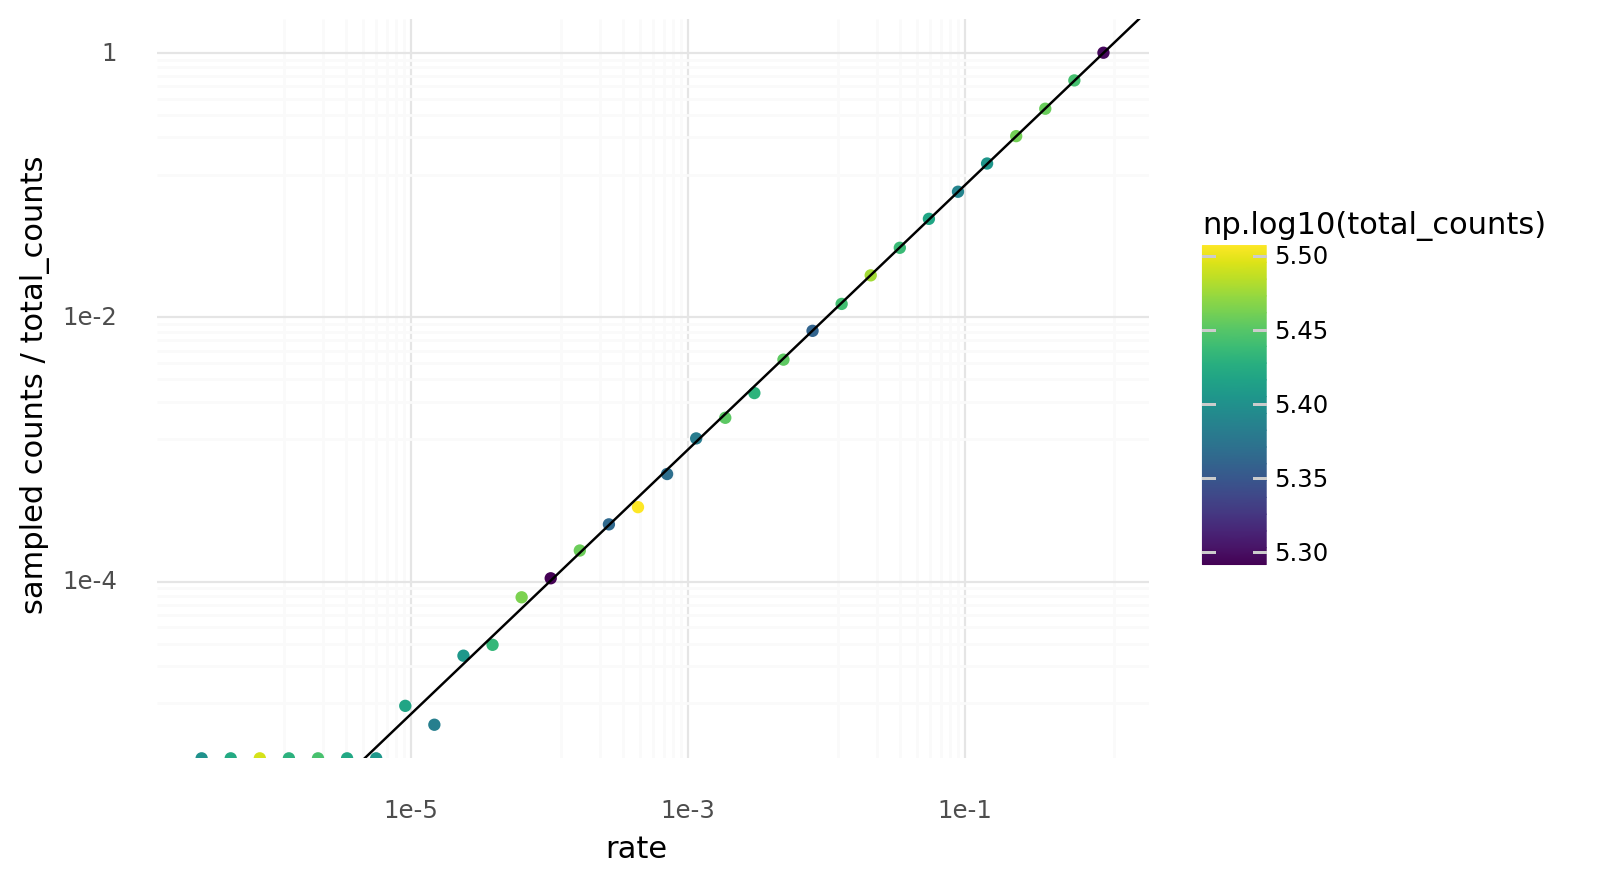

<ggplot: (8737857774340)>

In [45]:
(
    p.ggplot(p.aes(x = 'fraction', y = 'counts / total_counts', color = 'np.log10(total_counts)'), pdf)
    + p.geom_point()
    + p.geom_abline()
    + p.scale_y_log10()
    + p.scale_x_log10()
    + p.theme_minimal()
    + p.labs(x = 'rate', y = 'sampled counts / total_counts')
)